# Analisis y explorasion

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

autos_df = pd.read_csv("E:/Github/Portafolio_Analisis/Normatividad/precios_autos.csv")

autos_df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


Tenemos un conjunto de datos con diversas características de automóviles, incluyendo tanto variables cuantitativas (como "wheelbase", "carlength", "price", etc.) como variables categóricas (como "fueltype", "carbody", "drivewheel", etc.).

2. Medidas estadísticas:

- Variables cuantitativas: media, desviación estándar, cuartiles, etc.
- Variables categóricas: frecuencias.

In [3]:
desc_quantitative = autos_df.describe()

categorical_columns = autos_df.select_dtypes(include=['object']).columns
desc_categorical = autos_df[categorical_columns].apply(lambda x: x.value_counts()).transpose()

desc_quantitative, desc_categorical.head()

(        symboling   wheelbase   carlength    carwidth   carheight  \
 count  205.000000  205.000000  205.000000  205.000000  205.000000   
 mean     0.834146   98.756585  174.049268   65.907805   53.724878   
 std      1.245307    6.021776   12.337289    2.145204    2.443522   
 min     -2.000000   86.600000  141.100000   60.300000   47.800000   
 25%      0.000000   94.500000  166.300000   64.100000   52.000000   
 50%      1.000000   97.000000  173.200000   65.500000   54.100000   
 75%      2.000000  102.400000  183.100000   66.900000   55.500000   
 max      3.000000  120.900000  208.100000   72.300000   59.800000   
 
         curbweight  enginesize      stroke  compressionratio  horsepower  \
 count   205.000000  205.000000  205.000000        205.000000  205.000000   
 mean   2555.565854  126.907317    3.255415         10.142537  104.117073   
 std     520.680204   41.642693    0.313597          3.972040   39.544167   
 min    1488.000000   61.000000    2.070000          7.00000

Las estadísticas descriptivas para las variables cuantitativas se presentan en la primera tabla. Aquí se muestran medidas como la media, desviación estándar, mínimo, máximo y cuartiles para cada variable.

Las frecuencias para las variables categóricas se presentan en la segunda tabla. Sin embargo, esta tabla es bastante extensa debido a la gran cantidad de categorías únicas en algunas variables, como "CarName". Por lo tanto, solo se muestran las primeras filas.

3. Herramientas de visualización:

Vamos a explorar visualmente los datos. Empezaremos con las variables cuantitativas:
    Variables cuantitativas:
    - Medidas de posición: boxplots.
    - Análisis de distribución de los datos: histogramas.

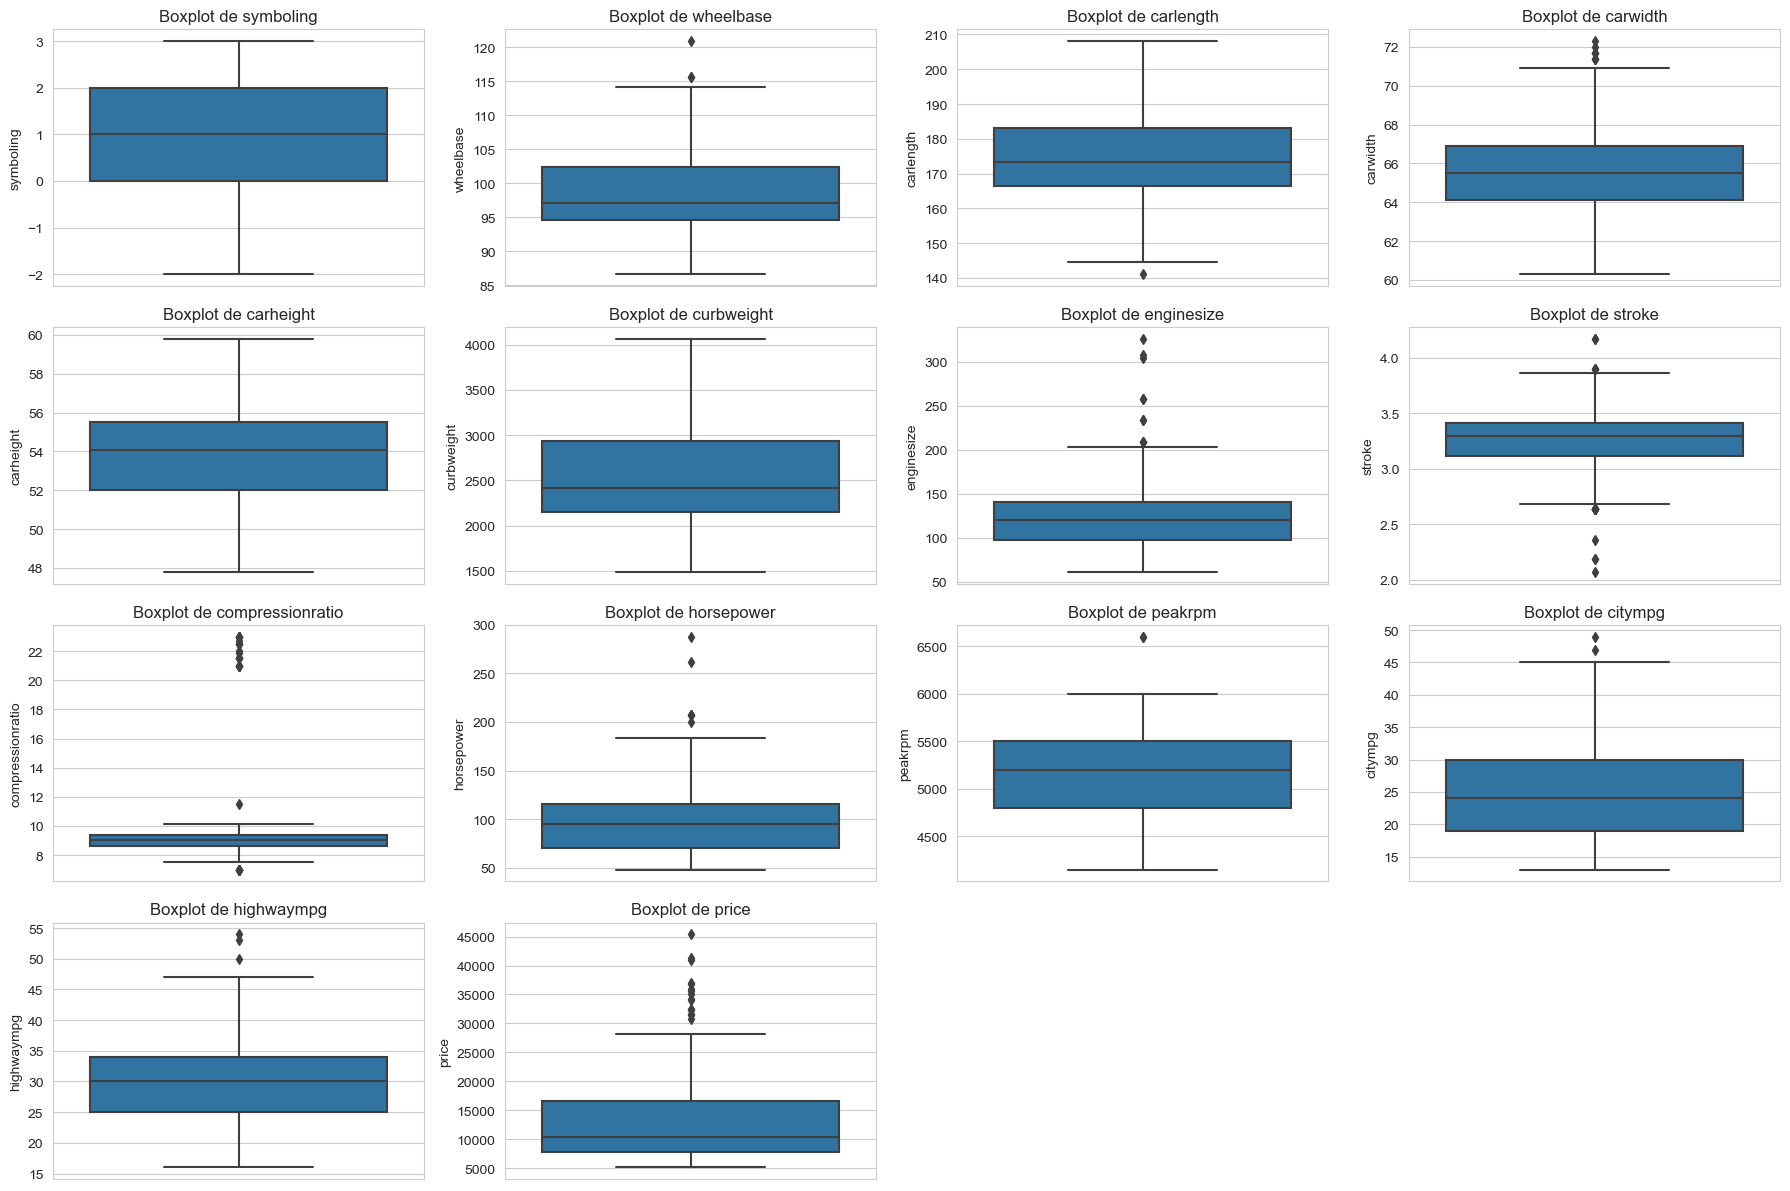

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

quantitative_columns = autos_df.select_dtypes(exclude=['object']).columns

for i, col in enumerate(quantitative_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=autos_df[col])
    plt.ylabel(col)
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

Los boxplots nos permiten identificar rápidamente la distribución, los cuartiles y los valores atípicos (outliers) de cada variable cuantitativa. Por ejemplo:

La variable price tiene varios valores atípicos en el extremo superior.
La variable compressionratio también presenta valores atípicos, aunque son menos en número.
Variables como symboling y peakrpm muestran una distribución bastante equilibrada sin valores atípicos evidentes.

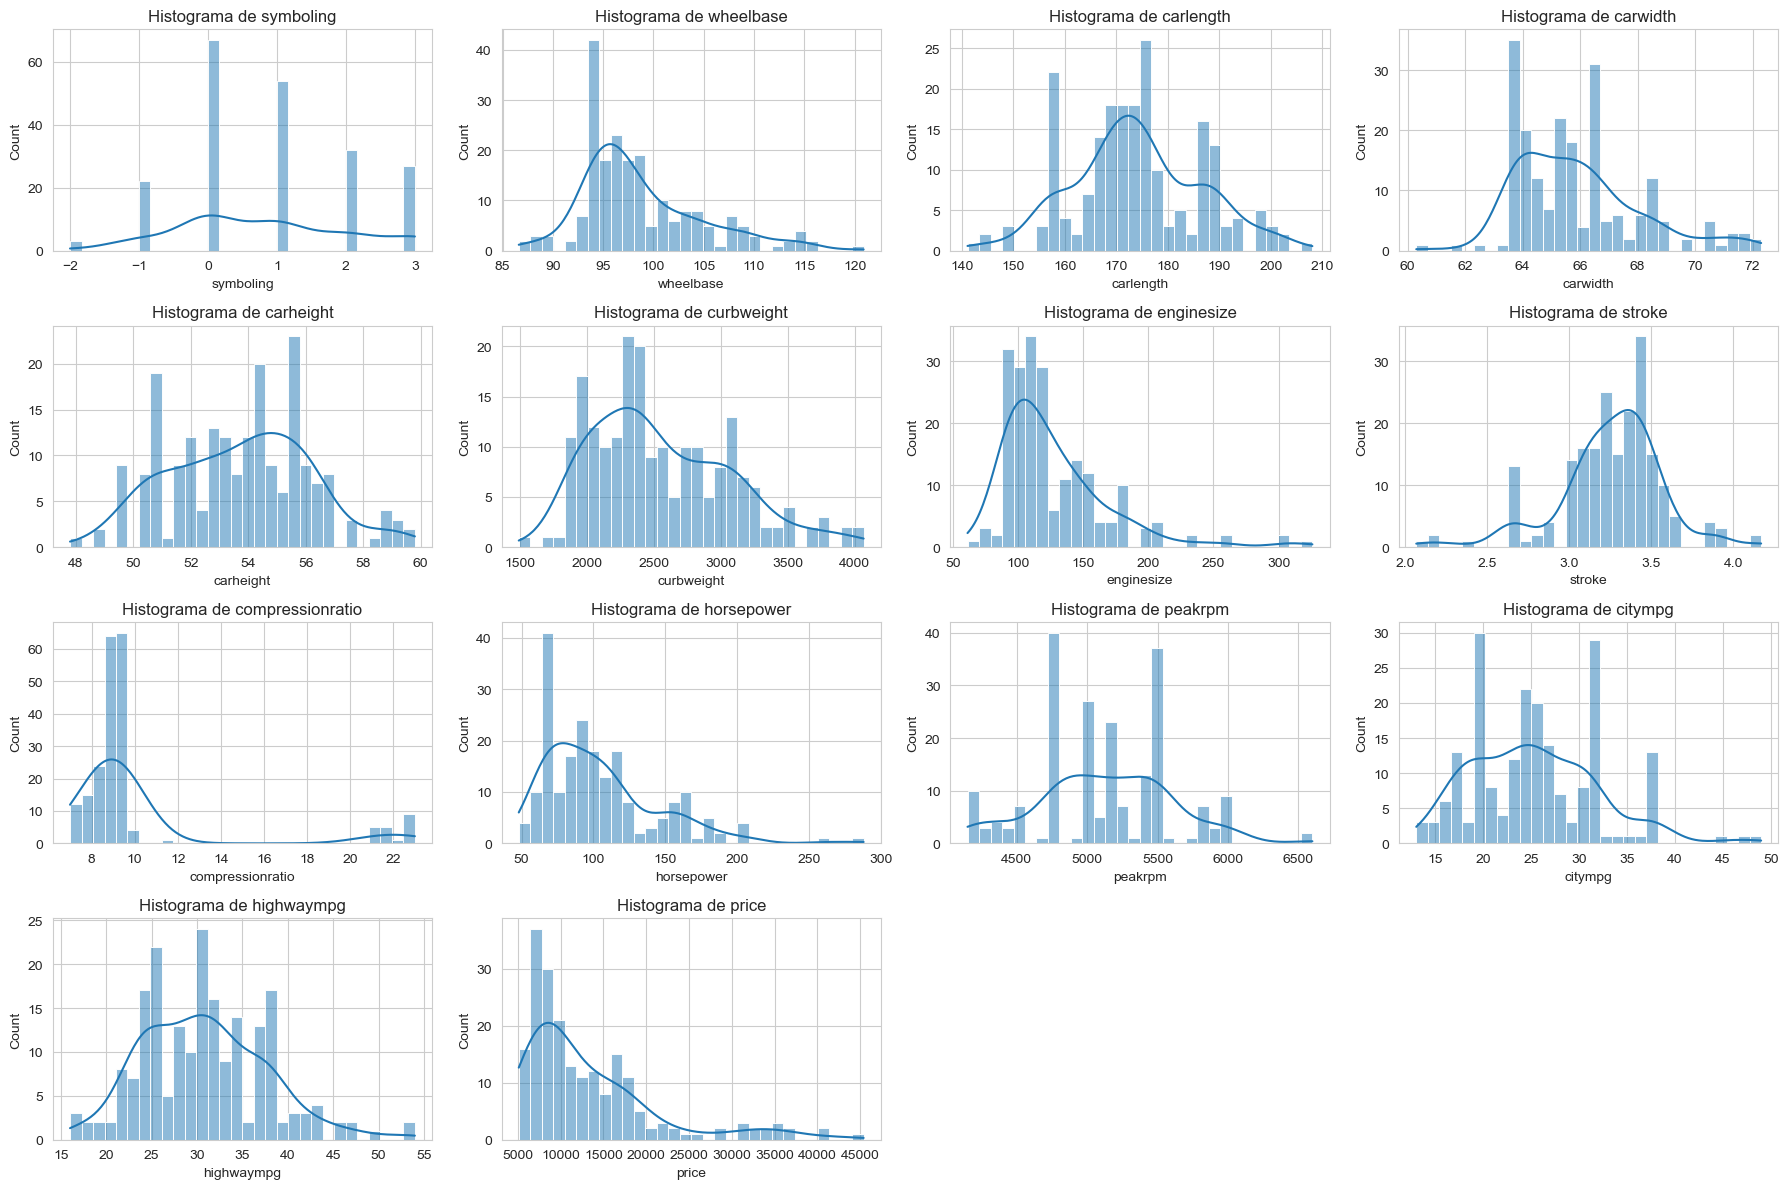

In [6]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(quantitative_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(autos_df[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.title(f"Histograma de {col}")

plt.tight_layout()
plt.show()

Los histogramas nos proporcionan información sobre la distribución de los datos para cada variable cuantitativa:

La mayoría de las variables, como carlength, carwidth, curbweight y enginesize, parecen tener distribuciones ligeramente sesgadas hacia la derecha (asimétricas positivas).
La variable price también tiene un sesgo positivo, lo que indica que hay más autos con precios bajos a medios en comparación con los de precio alto.
Algunas variables, como symboling y peakrpm, tienen distribuciones más uniformes o multimodales.

A continuación, analizaremos la colinealidad entre las variables cuantitativas. Utilizaremos un mapa de calor (heatmap) del coeficiente de correlación para visualizar las relaciones entre las variables, seguido de diagramas de dispersión para las variables que parezcan tener una correlación significativa.

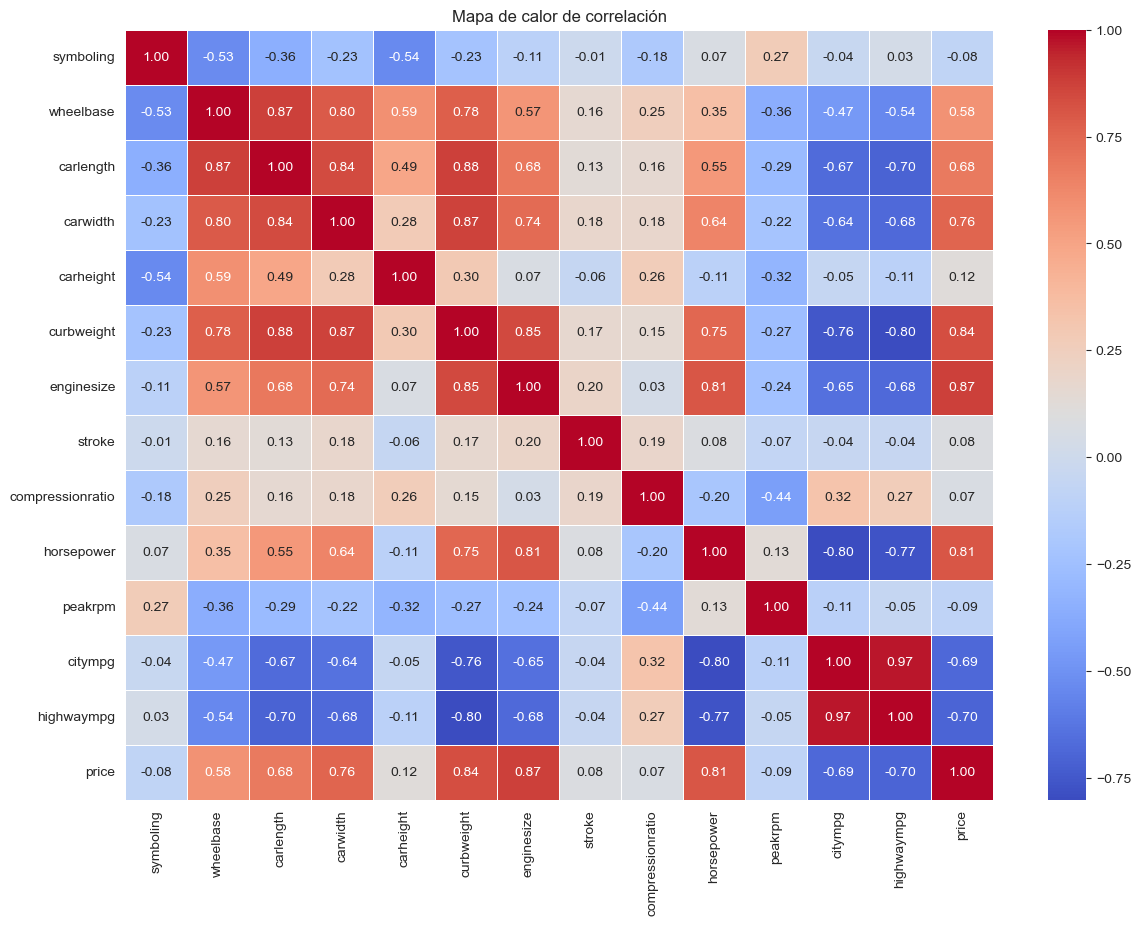

In [7]:
correlation_matrix = autos_df[quantitative_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()

El mapa de calor nos permite visualizar las correlaciones entre las variables cuantitativas:

Las celdas en tonos más claros indican correlaciones positivas fuertes, mientras que las celdas en tonos más oscuros indican correlaciones negativas.
Por ejemplo, hay una correlación positiva fuerte entre carwidth, carlength, y curbweight.
La variable price tiene correlaciones positivas notables con carwidth, carlength, curbweight, enginesize, y horsepower.
Por otro lado, hay una correlación negativa notable entre citympg/highwaympg y horsepower, curbweight, enginesize, y price.

A continuación, seleccionaré algunas combinaciones de variables que parecen tener una correlación significativa con price y dibujaré diagramas de dispersión para visualizar estas relaciones.

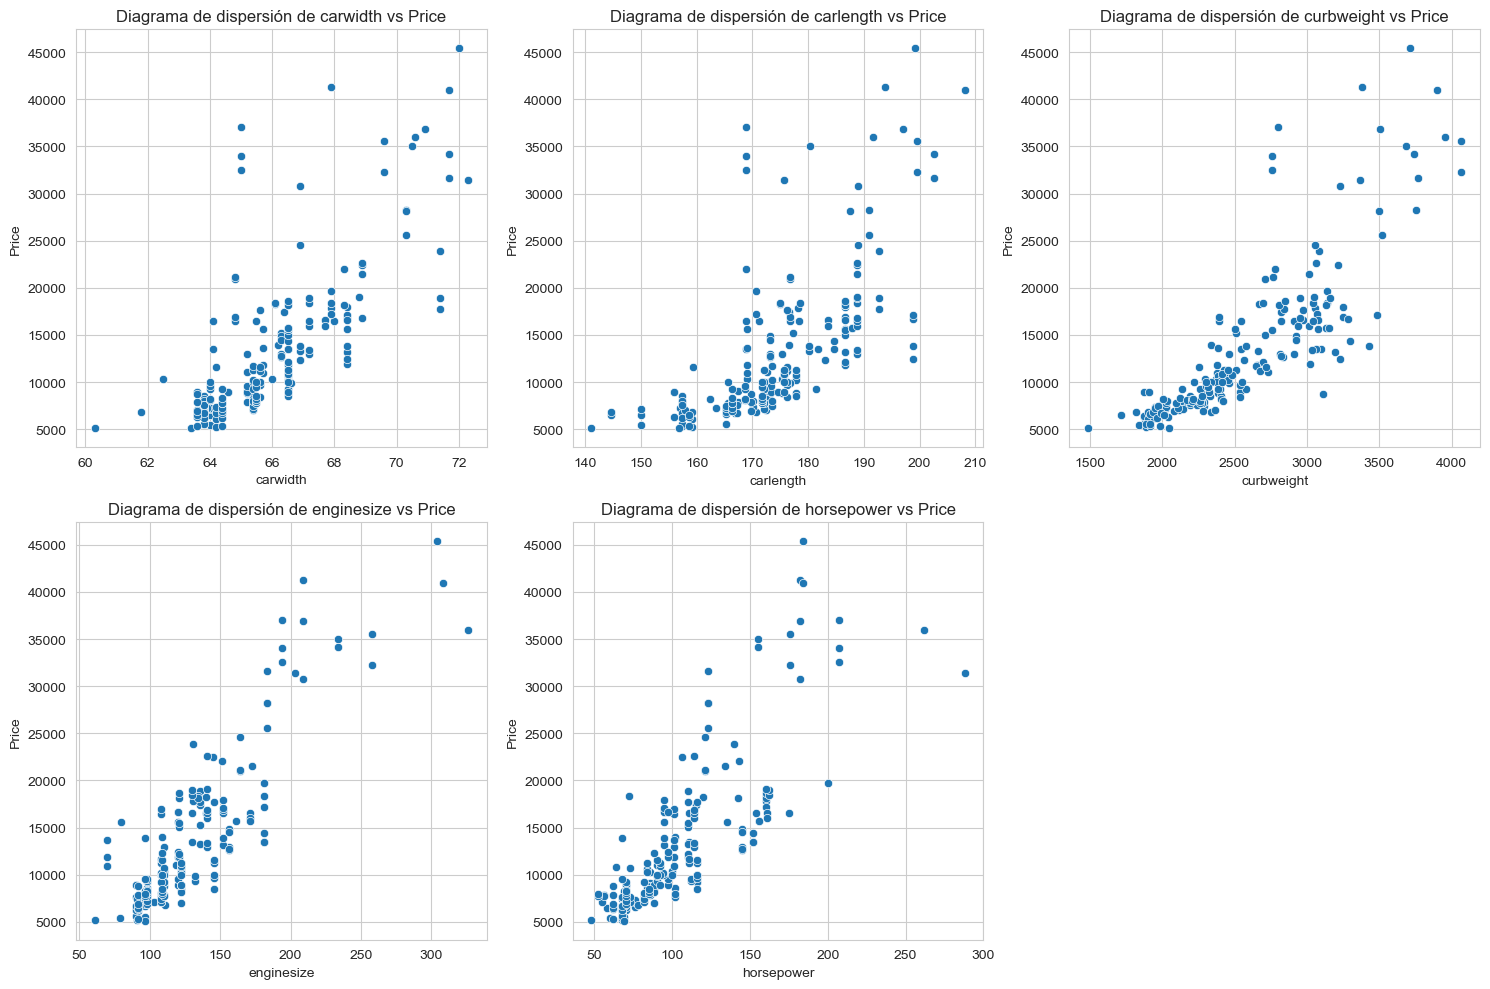

In [8]:
selected_combinations = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower']

plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_combinations, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=autos_df, x=col, y='price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f"Diagrama de dispersión de {col} vs Price")

plt.tight_layout()
plt.show()

Los diagramas de dispersión muestran relaciones claras entre las variables seleccionadas y el precio:

carwidth, carlength, curbweight, enginesize y horsepower muestran una tendencia positiva con price.
En general, a medida que estas variables aumentan, el precio también tiende a aumentar.

Pasemos ahora a las variables categóricas:

Variables categóricas:
Distribución de los datos: diagramas de barras y de pastel.
Asociación o colinealidad: diagramas de caja y bigote de price por categoría.

Comenzaremos visualizando la distribución de las variables categóricas utilizando diagramas de barras. Seleccionaré algunas de las variables categóricas clave para visualizar debido al gran número de categorías en algunas de las columnas (como "CarName").

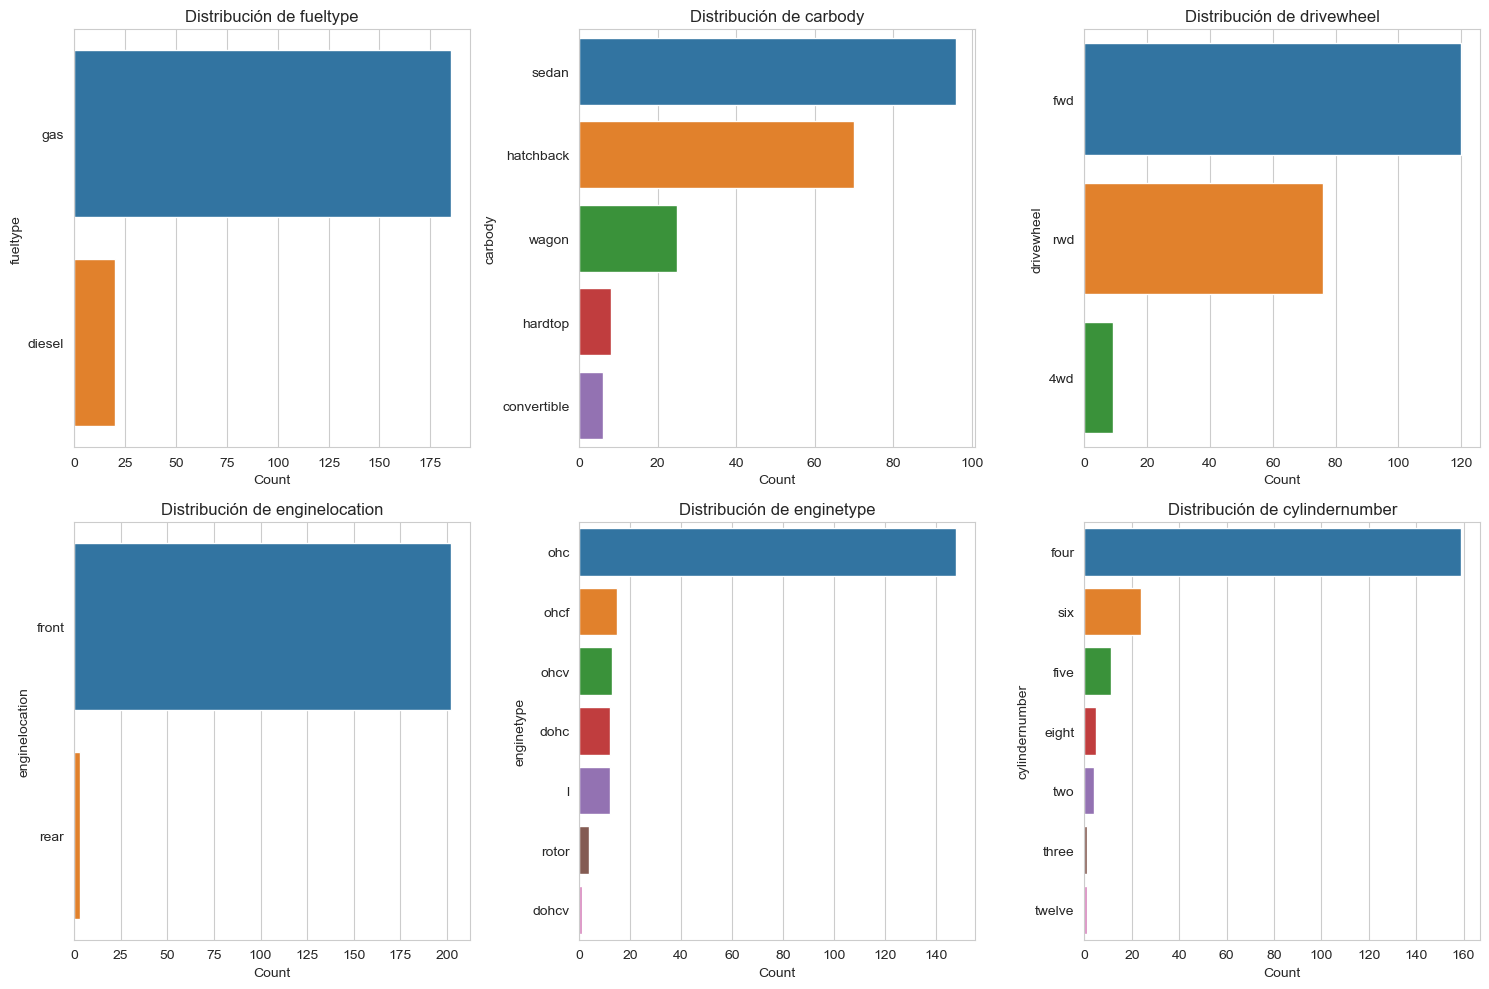

In [9]:
selected_categorical = ['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_categorical, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=autos_df, y=col, order=autos_df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

Los diagramas de barras nos muestran la distribución de las categorías para las variables seleccionadas:

La mayoría de los autos en el conjunto de datos utilizan gas como tipo de combustible.
Las categorías de carrocería más populares son sedan y hatchback.
La mayoría de los autos tienen tracción en las ruedas delanteras (fwd).
La mayoría de los autos tienen el motor ubicado en la parte delantera.
El tipo de motor más común es ohc.
La mayoría de los autos tienen four cilindros.

A continuación, analizaremos la asociación o colinealidad de estas variables categóricas con respecto al price. Utilizaremos diagramas de caja y bigote para visualizar la distribución del price para cada categoría de las variables seleccionadas.

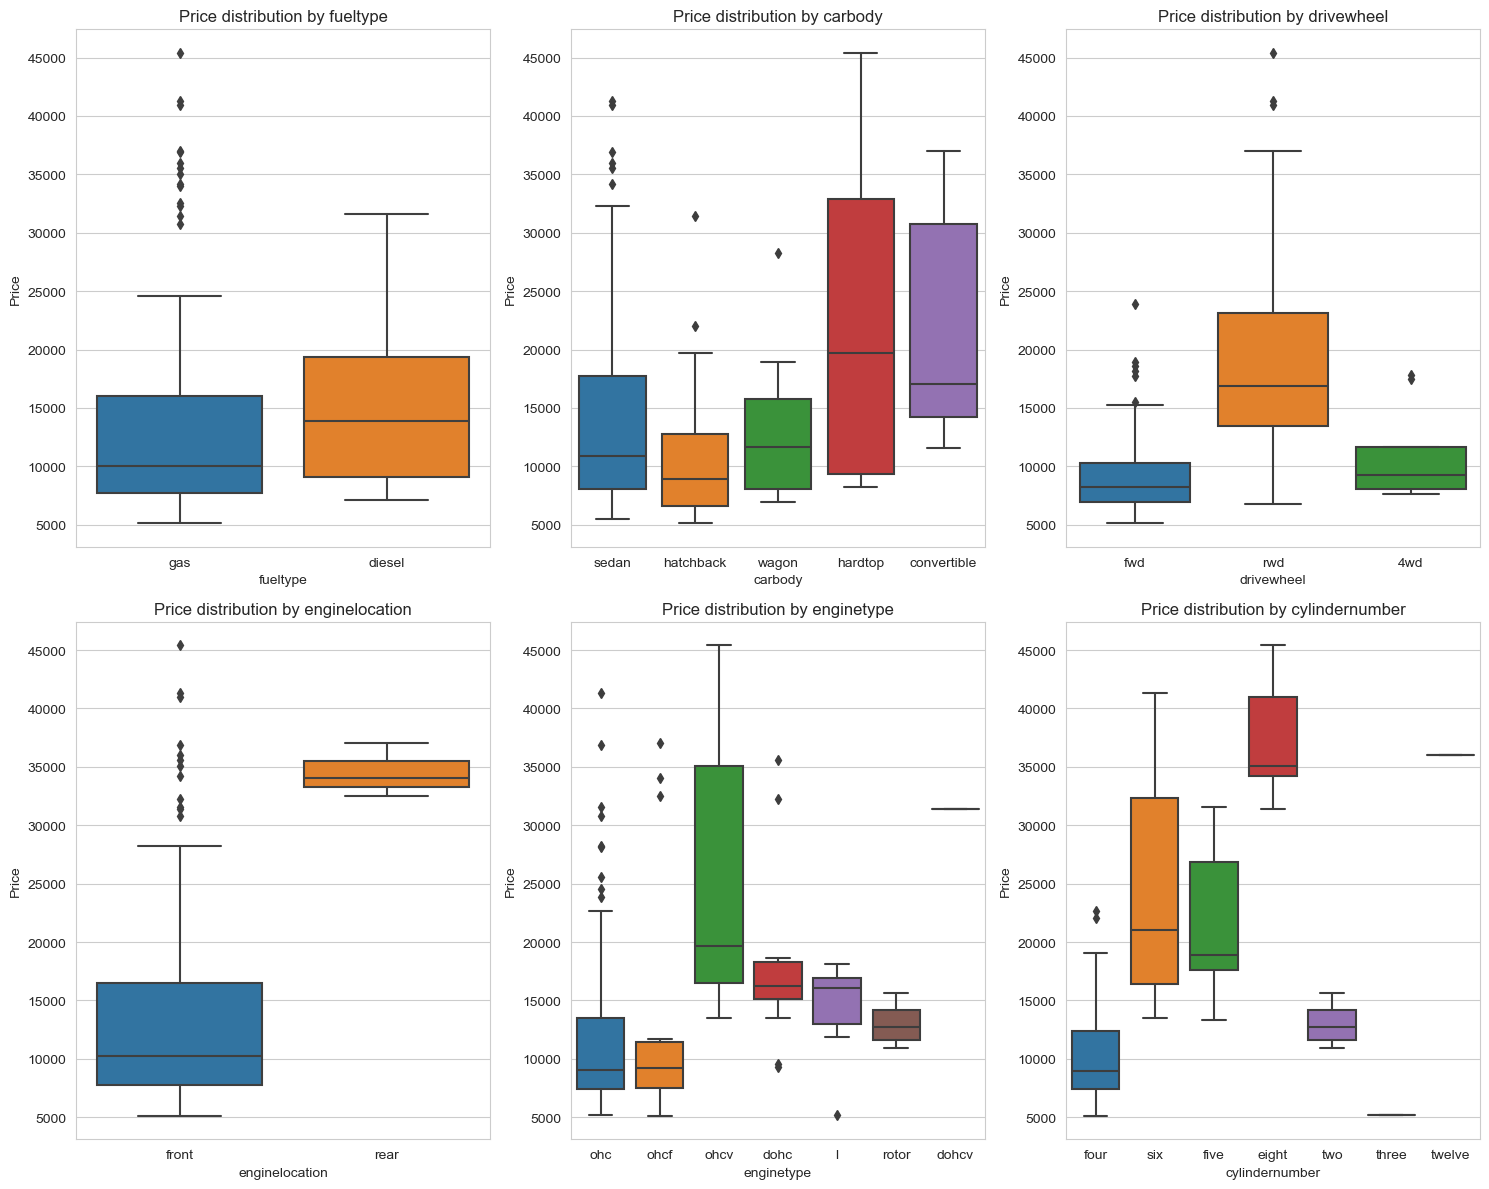

In [10]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(selected_categorical, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=autos_df, x=col, y='price', order=autos_df[col].value_counts().index)
    plt.title(f"Price distribution by {col}")
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

Los diagramas de caja y bigote nos muestran la distribución del precio en función de las categorías de las variables seleccionadas:

Los autos con diesel como tipo de combustible tienden a tener un rango de precios más amplio que los de gas, aunque la mediana es similar.
Los autos hardtop y convertible tienden a tener precios más altos en comparación con otros tipos de carrocería.
Los autos con tracción en las ruedas traseras (rwd) tienden a tener precios más altos.
Los autos con el motor ubicado en la parte trasera suelen tener precios más altos que aquellos con el motor en la parte delantera.
Los tipos de motor dohcv y ohcv muestran precios más altos en general.
Los autos con eight y six cilindros tienden a tener precios más altos en comparación con los de four cilindros.
Con base en este análisis, podemos identificar problemas de calidad de datos como valores faltantes y outliers.

Identificación de problemas de calidad de datos:
Valores faltantes
Outliers

In [11]:
missing_values = autos_df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values

Series([], dtype: int64)

No hay valores faltantes en el conjunto de datos, lo cual es una excelente noticia.

En cuanto a los valores atípicos (outliers), ya hemos identificado algunos al observar los boxplots. Por ejemplo, la variable price tiene varios outliers en el extremo superior.

Con base en el análisis exploratorio que hemos realizado, seleccionaría las siguientes variables como importantes para el análisis de las características de los automóviles que determinan su precio:

carwidth
carlength
curbweight
enginesize
horsepower
fueltype
Estas variables muestran una correlación significativa con el precio y tienen un impacto notable en la distribución del precio en función de sus categorías.

Preparación de la base de datos:
Ahora, avanzaremos con la preparación de la base de datos:

Seleccionar el conjunto de datos a utilizar.
Manejar datos categóricos: transformar a variables dummy si es necesario.
Manejar apropiadamente datos atípicos.
Transformar los datos en caso necesario.
Revisar si es necesario discretizar los datos.
Revisar si es necesario escalar y normalizar los datos.

Comenzaremos seleccionando el conjunto de datos que vamos a utilizar, basándonos en las variables identificadas previamente. Luego, transformaremos las variables categóricas en variables dummy.

In [12]:
selected_features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'horsepower', 'fueltype', 'price']
selected_df = autos_df[selected_features]

selected_df['fueltype'] = selected_df['fueltype'].map({'diesel': 1, 'gas': 0})

selected_df.head()

,carwidth,carlength,curbweight,enginesize,horsepower,fueltype,price
0,64.1,168.8,2548,130,111,0,13495.0
1,64.1,168.8,2548,130,111,0,16500.0
2,65.5,171.2,2823,152,154,0,16500.0
3,66.2,176.6,2337,109,102,0,13950.0
4,66.4,176.6,2824,136,115,0,17450.0


He seleccionado un subconjunto del dataframe original que se centrará en las características identificadas como importantes para determinar el precio de los automóviles. Además, he transformado la variable categórica fueltype en una variable dummy, donde el diesel se representa con 1 y el gas con 0.

Manejaremos los datos atípicos reemplazándolos con los percentiles 1 y 99 para cada variable del conjunto de datos seleccionado.

In [13]:
for col in selected_df.columns:
    if col != 'fueltype':
        lower_percentile = selected_df[col].quantile(0.01)
        upper_percentile = selected_df[col].quantile(0.99)
        selected_df[col] = selected_df[col].apply(lambda x: upper_percentile if x > upper_percentile else x)
        selected_df[col] = selected_df[col].apply(lambda x: lower_percentile if x < lower_percentile else x)

selected_df.describe()

,carwidth,carlength,curbweight,enginesize,horsepower,fueltype,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,65.918088,174.040917,2556.547122,126.797463,103.474927,0.097561,13251.698473
std,2.102825,12.213243,513.768384,40.884682,37.105975,0.297446,7892.003430
min,62.536000,144.816000,1819.720000,70.000000,52.120000,0.000000,5201.120000
25%,64.100000,166.300000,2145.000000,97.000000,70.000000,0.000000,7788.000000
50%,65.500000,173.200000,2414.000000,120.000000,95.000000,0.000000,10295.000000
75%,66.900000,183.100000,2935.000000,141.000000,116.000000,0.000000,16503.000000
max,71.700000,202.480000,3948.000000,302.160000,207.000000,1.000000,40802.720000


Hemos manejado los datos atípicos reemplazándolos con los percentiles 1 y 99 para las variables seleccionadas. Ahora, las estadísticas descriptivas reflejan los cambios, y los valores extremos se han ajustado.

Transformación de datos:
Las transformaciones se utilizan a menudo para normalizar o estabilizar la varianza de las variables. Una transformación común es la logarítmica. Dado que el precio de los automóviles puede variar en varios órdenes de magnitud, podría ser útil aplicar una transformación logarítmica al price. Sin embargo, primero debemos verificar si es necesario.

Para determinar si es necesario, visualizaremos la distribución del precio antes y después de la transformación logarítmica.

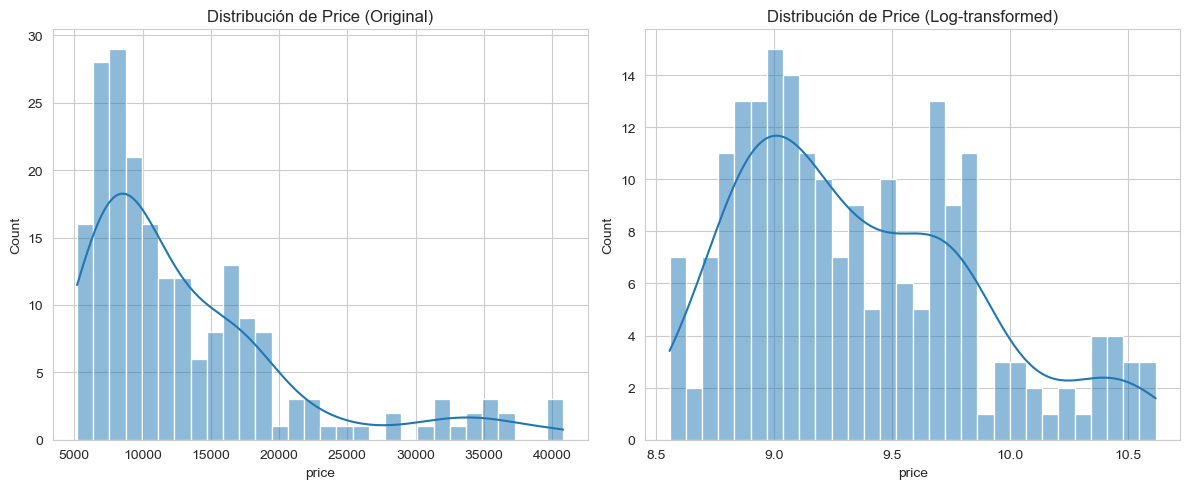

In [14]:
import numpy as np

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(selected_df['price'], kde=True, bins=30)
plt.title('Distribución de Price (Original)')

plt.subplot(1, 2, 2)
sns.histplot(np.log(selected_df['price']), kde=True, bins=30)
plt.title('Distribución de Price (Log-transformed)')

plt.tight_layout()
plt.show()

Las visualizaciones muestran la distribución del precio antes y después de la transformación logarítmica:

La distribución original de price está sesgada hacia la derecha.
Después de la transformación logarítmica, la distribución de price parece más simétrica y se asemeja más a una distribución normal.
Dada la mejora en la distribución, sería recomendable aplicar la transformación logarítmica al precio (price) en nuestro análisis.

A continuación, revisaremos si es necesario discretizar y escalar/normalizar los datos:

Discretización de datos:
La discretización implica transformar variables continuas en variables discretas (por ejemplo, en "bins" o intervalos). Sin embargo, no siempre es necesario. Para nuestro análisis, la discretización puede no ser esencial ya que estamos interesados en las relaciones continuas entre las características y el precio.

Escalado y normalización:
El escalado es importante cuando las características tienen diferentes magnitudes, ya que muchos algoritmos de aprendizaje automático son sensibles a la escala de las características. La normalización, por otro lado, ajusta los datos para que tengan una distribución normal.

Dado que vamos a utilizar modelos lineales, el escalado es crucial. Utilizaremos la técnica de escalado Min-Max para escalar las características.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(selected_df.drop(columns='fueltype'))

scaled_df = pd.DataFrame(scaled_features, columns=selected_df.drop(columns='fueltype').columns)
scaled_df['fueltype'] = selected_df['fueltype'].values

scaled_df.head()

,carwidth,carlength,curbweight,enginesize,horsepower,price,fueltype
0,0.170668,0.415927,0.342192,0.258442,0.380165,0.232964,0
1,0.170668,0.415927,0.342192,0.258442,0.380165,0.317370,0
2,0.323440,0.457547,0.471404,0.353205,0.657800,0.317370,0
3,0.399825,0.551193,0.243051,0.167988,0.322056,0.245744,0
4,0.421650,0.551193,0.471874,0.284287,0.405992,0.344054,0


as características han sido escaladas utilizando el método Min-Max, lo que significa que ahora todas las variables, excepto fueltype, tienen valores entre 0 y 1.

Con esto, hemos completado la exploración y preparación inicial de la base de datos.

In [16]:
scaled_df.to_csv('E:/Github/Portafolio_Analisis/Normatividad/autos_prepared.csv', index=False)